In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [13]:
# Load Project days dataset file 
data_8nov = pd.read_csv('ProcessedData_ProjectDay_20171108.csv')
data_22nov = pd.read_csv('ProcessedData_ProjectDay_20171122.csv')
data_18oct = pd.read_csv('ProcessedData_ProjectDay_20171018.csv')

groups_info = {}

# combined data
data_two = data_8nov.append([data_18oct])



print 'Entire dataset:',data_all.shape

groups_info ['2017-11-08'] = data_8nov.group.unique()
groups_info ['2017-11-22'] = data_22nov.group.unique()
groups_info ['2017-10-18'] =  data_18oct.group.unique()

data_two.drop(data_two.columns[0],axis=1,inplace=True)
data_two.to_csv('Data_two_days.csv')
data_two.dropna(how='any',inplace=True)
print data_two.shape

Entire dataset: (118, 13)
(118, 12)


In [14]:
# MFA correlation with data seperately
def drawCorrelation(datafile,mfafile,date,dim=1):
    data = pd.read_csv(datafile)
    mfar = pd.read_csv(mfafile)
    mfar.drop(mfar.columns[0],axis=1,inplace=True)
    data['mfa-1'] = mfar.iloc[:,0]
    data['mfa-2'] = mfar.iloc[:,1]
    data.drop(data.columns[0:3],axis=1,inplace=True)
    fig, ax = plt.subplots()
    corr_matrix = data.corr()
    attr = [a for a in data.columns[0:10]]
    if dim == 1:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-1'][0:10])
    else:
        ax.barh(np.arange(len(attr)),corr_matrix['mfa-2'][0:10])
    ax.set_title('Correlation of MFA dim-%d with attributes %s'%(dim,date))
    ax.set_yticks(np.arange(len(attr)))
    ax.set_yticklabels(attr)
    plt.savefig('Corr_MFA dim-%d for %s'%(dim,date))
    plt.show()

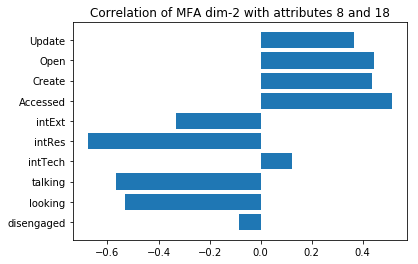

In [20]:
drawCorrelation('Data_two_days.csv','mfa_two_day.csv','8 and 18',dim=2)

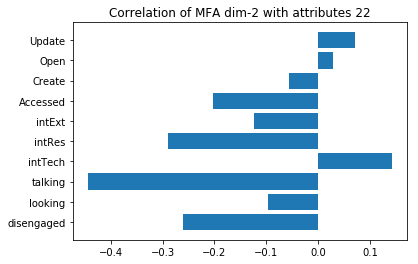

In [19]:
drawCorrelation('ProcessedData_ProjectDay_20171018.csv','mfa_third_day.csv','22',dim=2)